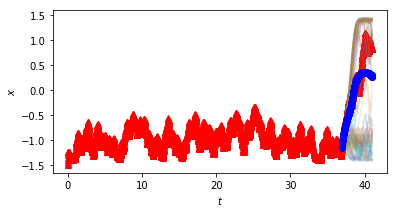

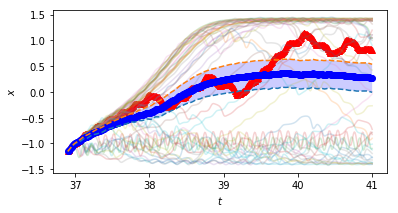

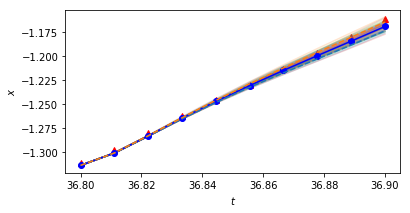

[1, 3, 6, 7, 11, 14, 15, 16, 18, 19, 21, 26, 29, 30, 33, 35, 36, 37, 38, 40, 41, 43, 45, 47]
24
######################### Final Prediction Results #########################


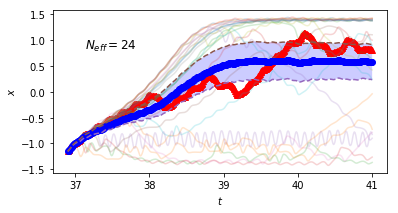

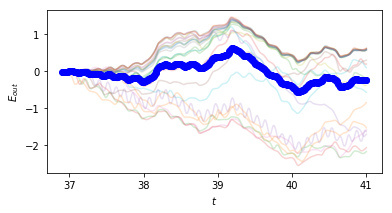

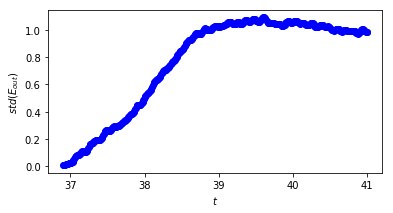

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem

####################### Change the parameters and filename below ###################################
####################################################################################################
#training/testing parameters
valid= 10 #N_v
n_ens = 50
future = 410 
trainlen = 3690 
trainbeg = 0 
num_std1 = 8 #start with 8 and increase by one if N_eff = 0 (parameter for weighting in ensembles)

data_orig = pd.read_csv("xdata_eg1.csv",header=None)
data_orig = np.array(data_orig)
data_orig = data_orig[:,1]

osol = pd.read_csv("RSPA19_Ex1_3690-10_50ens_fin.csv",header=None)
osol = np.array(osol)
#print(osol.shape)

#####################################################################################################      
#visualize results
t_tr=np.linspace(trainbeg,trainlen,trainlen-trainbeg)/100
t_res=np.linspace(trainlen,(trainlen+future),future)/100
t_val=np.linspace(trainlen-valid-trainbeg,trainlen-trainbeg,valid)/100

plt.rcParams['axes.facecolor']='white'

ax1=plt.figure(figsize=(6,3))
plt.plot(t_tr,data_orig[trainbeg:trainlen],'r^')
plt.plot(t_res,data_orig[trainlen:trainlen+future],'r^')
solp=[]
for i in range(n_ens):
    solp.append(osol[i,trainlen-trainbeg:trainlen+future-trainbeg])
    plt.plot(t_res,osol[i,trainlen-trainbeg:trainlen+future-trainbeg],alpha=0.2)
plt.plot(t_res, np.mean(solp,axis=0),'b-o')
#ax1.text(0.1, 0.96,'(a)', fontsize=12, verticalalignment='top')
plt.xlabel('$t$')
plt.ylabel('$x$')
#plt.grid(b=None)
#plt.legend(['training','predicted','actual'])
#plt.title('position (slow variable)')
plt.show()

#true position, multiple predicted positions, the averaged prediction and the 90 percent confidence interval
sonn=[]
ax4=plt.figure(figsize=(6,3))
plt.plot(t_res,data_orig[trainlen:trainlen+future],'r^')
for k in range(n_ens):
    plt.plot(t_res, osol[int(k),trainlen-trainbeg:trainlen+future-trainbeg],alpha=0.2)
    sonn.append(osol[int(k),trainlen-trainbeg:trainlen+future-trainbeg])
stderr = sem(sonn,axis=0)  #std error of the mean (sem) provides a simple measure of uncertainty in a value
#Remark: Confidence interval is calculated assuming the samples are drawn from a Gaussian distribution
#Justification: As the sample size tends to infinity the central limit theorem guarantees that the sampling 
#               distribution of the mean is asymptotically normal
plt.plot(t_res,np.mean(sonn,axis=0),'b-o')
y1=np.mean(sonn,axis=0)-1.645*stderr
y2=np.mean(sonn,axis=0)+1.645*stderr
plt.plot(t_res,y1,'--')
plt.plot(t_res,y2,'--')
plt.fill_between(t_res, y1, y2, facecolor='blue', alpha=0.2)
#ax4.text(0.1, 0.96,'(b)', fontsize=12, verticalalignment='top')
plt.xlabel('$t$')
plt.ylabel('$x$')
#plt.grid(False)
#plt.title('true position, multiple predicted positions, the averaged prediction and the 90 percent confidence interval')
plt.show()

son=[]
ax5=plt.figure(figsize=(6,3))
plt.plot(t_val,data_orig[trainlen-valid:trainlen],'r^')
for k in range(n_ens):
    plt.plot(t_val, osol[int(k),trainlen-trainbeg-valid:trainlen-trainbeg],alpha=0.2)
    son.append(osol[int(k),trainlen-trainbeg-valid:trainlen-trainbeg])
std = sem(son,axis=0)  #std error of the mean (sem) provides a simple measure of uncertainty in a value
#Remark: Confidence interval is calculated assuming the samples are drawn from a Gaussian distribution
#Justification: As the sample size tends to infinity the central limit theorem guarantees that the sampling 
#               distribution of the mean is asymptotically normal
plt.plot(t_val,np.mean(son,axis=0),'b-o')
y3=np.mean(son,axis=0)-num_std1*std 
y4=np.mean(son,axis=0)+num_std1*std
plt.plot(t_val,y3,'--')
plt.plot(t_val,y4,'--')
plt.fill_between(t_val, y3, y4, facecolor='blue', alpha=0.2)
#ax4.text(0.1, 0.96,'(b)', fontsize=12, verticalalignment='top')
plt.xlabel('$t$')
plt.ylabel('$x$')
#plt.grid(False)
#plt.title('true position, multiple predicted positions, the averaged prediction and the 90 percent confidence interval')
plt.show()

sel = []
for i in range(n_ens):
    if all(y4 > son[i]) and all(y3 < son[i]):
        sel.append(i)
print(sel)
print(len(sel))

############################################################################################
print('######################### Final Prediction Results #########################')

sonn=[]
ax6=plt.figure(figsize=(6,3))
plt.plot(t_res,data_orig[trainlen:trainlen+future],'r^')
for k in sel:
    plt.plot(t_res, osol[int(k),trainlen-trainbeg:trainlen+future-trainbeg],alpha=0.2)
    sonn.append(osol[int(k),trainlen-trainbeg:trainlen+future-trainbeg])
stderr = sem(sonn,axis=0)  #std error of the mean (sem) provides a simple measure of uncertainty in a value
#Remark: Confidence interval is calculated assuming the samples are drawn from a Gaussian distribution
#Justification: As the sample size tends to infinity the central limit theorem guarantees that the sampling 
#               distribution of the mean is asymptotically normal
plt.plot(t_res,np.mean(sonn,axis=0),'b-o')
y1=np.mean(sonn,axis=0)-1.645*stderr
y2=np.mean(sonn,axis=0)+1.645*stderr
plt.plot(t_res,y1,'--')
plt.plot(t_res,y2,'--')
plt.fill_between(t_res, y1, y2, facecolor='blue', alpha=0.2)
#plt.legend('$N_{eff}=27$')

#=====================================================
ax6.text(0.2, 0.7,'$N_{eff}=24$', fontsize=12) #change N_eff here when plotting
plt.xlabel('$t$')
plt.ylabel('$x$')
#plt.grid(False)
#plt.title('true position, multiple predicted positions, the averaged prediction and the 90 percent confidence interval')
plt.show()

#pathwise metric:
#error for predicted position
ax2=plt.figure(figsize=(6,3))
error=[]
for i in sel:
    diff=osol[int(i),trainlen-trainbeg:trainlen+future-trainbeg]-data_orig[trainlen-trainbeg:trainlen+future-trainbeg]
    error.append(diff)
    plt.plot(t_res,diff,alpha=0.2)
plt.plot(t_res, np.mean(error,axis=0),'b-o')
#ax2.text(0.1, 0.96,'(c)', fontsize=12, verticalalignment='top')
plt.xlabel('$t$')
plt.ylabel('$E_{out}$')
#plt.grid(b=None)
#plt.title('error for predicted position')
plt.show()

#std dev for predicted positions
ax3=plt.figure(figsize=(6,3))
stdev=np.std(error,axis=0)
plt.plot(t_res, stdev,'b-o')
#ax3.text(0.1, 0.96,'(d)', fontsize=12, verticalalignment='top')
plt.xlabel('$t$')
plt.ylabel('$std(E_{out})$')
#plt.grid(b=None)
#plt.title('std dev for predicted position')
plt.show()

stdev1=np.std(error,axis=0)

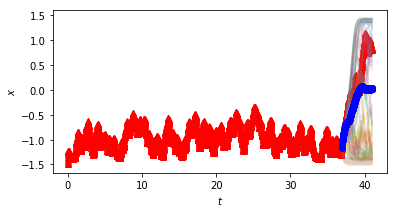

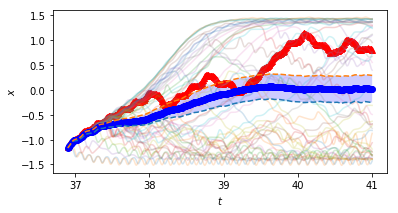

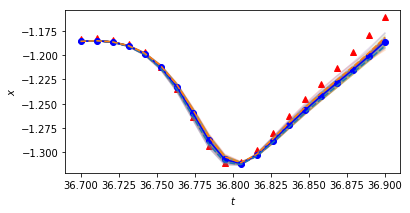

[4, 8, 12, 15, 17, 18, 19, 22, 23, 26, 27, 30, 32, 34, 35, 41, 43, 47]
18
######################### Final Prediction Results #########################


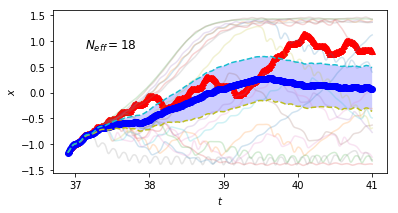

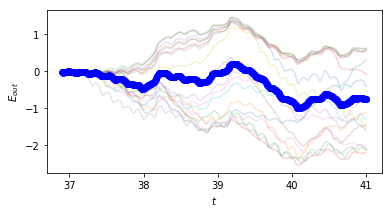

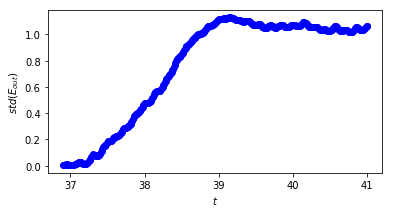

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem

####################### Change the parameters and filename below ###################################
####################################################################################################
#training/testing parameters
valid= 20 #N_v
n_ens = 50
future = 410 
trainlen = 3690 
trainbeg = 0 
num_std2 = 8 #start with 8 and increase by one if N_eff = 0 (parameter for weighting in ensembles)

data_orig = pd.read_csv("xdata_eg1.csv",header=None)
data_orig = np.array(data_orig)
data_orig = data_orig[:,1]

osol = pd.read_csv("RSPA19_Ex1_3690-20_50ens_fin.csv",header=None)
osol = np.array(osol)
#print(osol.shape)

#####################################################################################################      
#visualize results
t_tr=np.linspace(trainbeg,trainlen,trainlen-trainbeg)/100
t_res=np.linspace(trainlen,(trainlen+future),future)/100
t_val=np.linspace(trainlen-valid-trainbeg,trainlen-trainbeg,valid)/100

plt.rcParams['axes.facecolor']='white'

ax1=plt.figure(figsize=(6,3))
plt.plot(t_tr,data_orig[trainbeg:trainlen],'r^')
plt.plot(t_res,data_orig[trainlen:trainlen+future],'r^')
solp=[]
for i in range(n_ens):
    solp.append(osol[i,trainlen-trainbeg:trainlen+future-trainbeg])
    plt.plot(t_res,osol[i,trainlen-trainbeg:trainlen+future-trainbeg],alpha=0.2)
plt.plot(t_res, np.mean(solp,axis=0),'b-o')
#ax1.text(0.1, 0.96,'(a)', fontsize=12, verticalalignment='top')
plt.xlabel('$t$')
plt.ylabel('$x$')
#plt.grid(b=None)
#plt.legend(['training','predicted','actual'])
#plt.title('position (slow variable)')
plt.show()


#true position, multiple predicted positions, the averaged prediction and the 90 percent confidence interval
sonn=[]
ax4=plt.figure(figsize=(6,3))
plt.plot(t_res,data_orig[trainlen:trainlen+future],'r^')
for k in range(n_ens):
    plt.plot(t_res, osol[int(k),trainlen-trainbeg:trainlen+future-trainbeg],alpha=0.2)
    sonn.append(osol[int(k),trainlen-trainbeg:trainlen+future-trainbeg])
stderr = sem(sonn,axis=0)  #std error of the mean (sem) provides a simple measure of uncertainty in a value
#Remark: Confidence interval is calculated assuming the samples are drawn from a Gaussian distribution
#Justification: As the sample size tends to infinity the central limit theorem guarantees that the sampling 
#               distribution of the mean is asymptotically normal
plt.plot(t_res,np.mean(sonn,axis=0),'b-o')
y1=np.mean(sonn,axis=0)-1.645*stderr
y2=np.mean(sonn,axis=0)+1.645*stderr
plt.plot(t_res,y1,'--')
plt.plot(t_res,y2,'--')
plt.fill_between(t_res, y1, y2, facecolor='blue', alpha=0.2)
#ax4.text(0.1, 0.96,'(b)', fontsize=12, verticalalignment='top')
plt.xlabel('$t$')
plt.ylabel('$x$')
#plt.grid(False)
#plt.title('true position, multiple predicted positions, the averaged prediction and the 90 percent confidence interval')
plt.show()

son=[]
ax5=plt.figure(figsize=(6,3))
plt.plot(t_val,data_orig[trainlen-valid:trainlen],'r^')
for k in range(n_ens):
    plt.plot(t_val, osol[int(k),trainlen-trainbeg-valid:trainlen-trainbeg],alpha=0.2)
    son.append(osol[int(k),trainlen-trainbeg-valid:trainlen-trainbeg])
std = sem(son,axis=0)  #std error of the mean (sem) provides a simple measure of uncertainty in a value
#Remark: Confidence interval is calculated assuming the samples are drawn from a Gaussian distribution
#Justification: As the sample size tends to infinity the central limit theorem guarantees that the sampling 
#               distribution of the mean is asymptotically normal
plt.plot(t_val,np.mean(son,axis=0),'b-o')
y3=np.mean(son,axis=0)-num_std2*std
y4=np.mean(son,axis=0)+num_std2*std
plt.plot(t_val,y3,'--')
plt.plot(t_val,y4,'--')
plt.fill_between(t_val, y3, y4, facecolor='blue', alpha=0.2)
#ax4.text(0.1, 0.96,'(b)', fontsize=12, verticalalignment='top')
plt.xlabel('$t$')
plt.ylabel('$x$')
#plt.grid(False)
#plt.title('true position, multiple predicted positions, the averaged prediction and the 90 percent confidence interval')
plt.show()

sel = []
for i in range(n_ens):
    if all(y4 > son[i]) and all(y3 < son[i]):
        sel.append(i)
print(sel)
print(len(sel))

############################################################################################
print('######################### Final Prediction Results #########################')

sonn=[]
ax6=plt.figure(figsize=(6,3))
plt.plot(t_res,data_orig[trainlen:trainlen+future],'r^')
for k in sel:
    plt.plot(t_res, osol[int(k),trainlen-trainbeg:trainlen+future-trainbeg],alpha=0.2)
    sonn.append(osol[int(k),trainlen-trainbeg:trainlen+future-trainbeg])
stderr = sem(sonn,axis=0)  #std error of the mean (sem) provides a simple measure of uncertainty in a value
#Remark: Confidence interval is calculated assuming the samples are drawn from a Gaussian distribution
#Justification: As the sample size tends to infinity the central limit theorem guarantees that the sampling 
#               distribution of the mean is asymptotically normal
plt.plot(t_res,np.mean(sonn,axis=0),'b-o')
y1=np.mean(sonn,axis=0)-1.645*stderr
y2=np.mean(sonn,axis=0)+1.645*stderr
plt.plot(t_res,y1,'--')
plt.plot(t_res,y2,'--')
plt.fill_between(t_res, y1, y2, facecolor='blue', alpha=0.2)
#plt.legend('$N_{eff}=27$')

#=====================================================
ax6.text(0.2, 0.7,'$N_{eff}=18$', fontsize=12) #change N_eff here when plotting
plt.xlabel('$t$')
plt.ylabel('$x$')
#plt.grid(False)
#plt.title('true position, multiple predicted positions, the averaged prediction and the 90 percent confidence interval')
plt.show()

#pathwise metric:
#error for predicted position
ax2=plt.figure(figsize=(6,3))
error=[]
for i in sel:
    diff=osol[int(i),trainlen-trainbeg:trainlen+future-trainbeg]-data_orig[trainlen-trainbeg:trainlen+future-trainbeg]
    error.append(diff)
    plt.plot(t_res,diff,alpha=0.2)
plt.plot(t_res, np.mean(error,axis=0),'b-o')
#ax2.text(0.1, 0.96,'(c)', fontsize=12, verticalalignment='top')
plt.xlabel('$t$')
plt.ylabel('$E_{out}$')
#plt.grid(b=None)
#plt.title('error for predicted position')
plt.show()

#std dev for predicted positions
ax3=plt.figure(figsize=(6,3))
stdev=np.std(error,axis=0)
plt.plot(t_res, stdev,'b-o')
#ax3.text(0.1, 0.96,'(d)', fontsize=12, verticalalignment='top')
plt.xlabel('$t$')
plt.ylabel('$std(E_{out})$')
#plt.grid(b=None)
#plt.title('std dev for predicted position')
plt.show()

stdev2=np.std(error,axis=0)

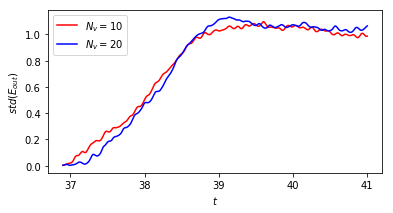

In [7]:
ax=plt.figure(figsize=(6,3))
plt.plot(t_res, stdev1,'-r',label='$N_v=10$')
plt.plot(t_res, stdev2,'-b',label='$N_v=20$')
#ax.text(0.1, 0.96,'(d)', fontsize=12, verticalalignment='top')
plt.xlabel('$t$')
plt.ylabel('$std(E_{out})$')
plt.legend()
plt.show()